# 第七章作业

In [1]:
import MonteCarlo as MC
import sympy as symp
import numpy as np
import matplotlib.pyplot as plt

1. 结果见代码

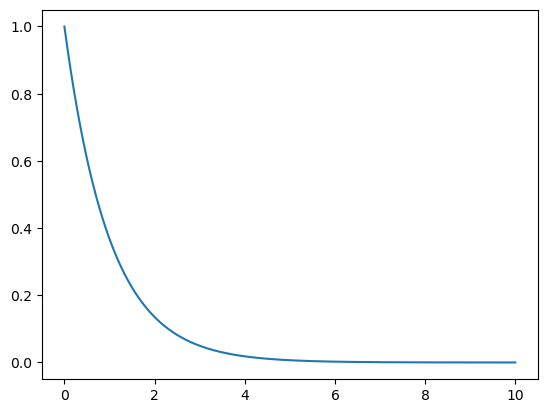

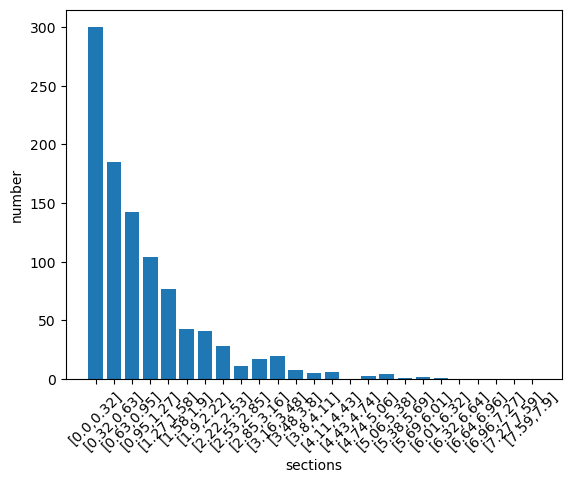

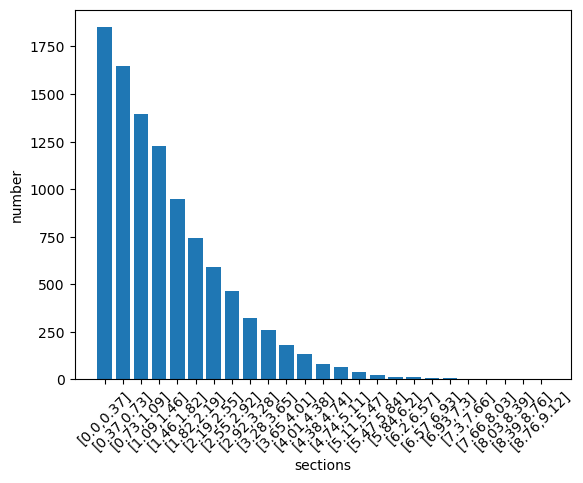

In [2]:
Lambda = 1
xlist1 = np.linspace(0, 10, 1000)
ylist1 = Lambda * np.exp(-Lambda * xlist1)
plt.plot(xlist1, ylist1)
plt.show()

x = symp.symbols("x", positive=True)

xlist2 = MC.Non_Uniform_Random(
    Lambda * symp.exp(-Lambda * x), 1000, method="Rejection", boundary={x: [0, 10]}
)
MC.Show_Distribution(xlist2)
xlist3 = MC.Non_Uniform_Random(
    symp.Piecewise((Lambda * symp.exp(-Lambda * x), x >= 0), (0, x < 0)),
    10000,
    delta=6,
    boundary={x: [0, 10]},
)
MC.Show_Distribution(xlist3)

求逆法

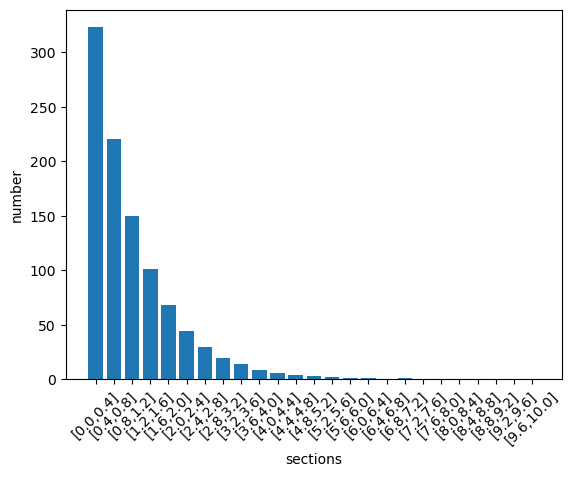

In [5]:
import random
import scipy.integrate as integrate
import scipy.optimize as opt
import scipy.interpolate as interp


def Rand_Inverse(
    distribution: symp.Expr,
    number: int,
    boundary: dict = None,
) -> list:
    symbols = list(boundary.keys())
    bounds_distribution = tuple(boundary.values())[0]
    distribution_ = symp.lambdify(symbols, distribution, "numpy")
    points = []

    x_temp = [
        [
            boundary[symbols[j]][0]
            + (boundary[symbols[j]][1] - boundary[symbols[j]][0]) * (i / 30)
            for i in range(31)
        ]
        for j in range(len(symbols))
    ]
    F = [
        integrate.nquad(
            distribution_,
            [(0, x_temp[j][i]) for j in range(len(symbols))],
        )[0]
        for i in range(31)
    ]

    # TODO这里只能处理一维的插值，将求逆法扩展到高维时这里要修改
    F_func = interp.interp1d(x_temp[0], F, kind="linear", fill_value="extrapolate")

    point_y = [
        F_func(x_temp[0][0])
        + (i / (number - 1)) * (F_func(x_temp[0][-1]) - F_func(x_temp[0][0]))
        for i in range(number)
    ]

    def F_sol(x, i):
        return F_func(x) - point_y[i]

    x0 = [
        boundary[symbols[j]][0]
        + (boundary[symbols[j]][1] - boundary[symbols[j]][0]) * 0.5
        for j in range(len(symbols))
    ]
    if len(x0) == 1:
        x0 = x0[0]

    points = [opt.root(F_sol, x0, args=(i,)).x[0] for i in range(len(point_y))]

    return points


Lambda = 1
x = symp.symbols("x", positive=True)
xlist4 = Rand_Inverse(Lambda * symp.exp(-Lambda * x), 1000, boundary={x: [0, 10]})
MC.Show_Distribution(xlist4)

2. 变分蒙特卡洛伪代码和流程图如下所示

<img src="蒙特卡洛.png" width = 40%>

$x=x_0$        
$define \quad\psi(x)$       
$for\quad i \quad in \quad range(N)$         
$\qquad$ F = $\frac{{2\nabla \psi \left( x \right)}}{{\psi \left( x \right)}}$  
$\qquad$ $x' = x + 2DF\left( x \right)\delta t + {\cal N}\left( {x,2D\delta t} \right)$     
$\qquad W\left( {x,x'} \right) = \min \left( {1,\frac{{G\left( {x,x'} \right)\psi {{\left( {x'} \right)}^2}}}{{G\left( {x',x} \right)\psi {{\left( x \right)}^2}}}} \right)$    
$\qquad \eta  = \left[ {0,1} \right]$   
$\qquad if \quad\eta < W(x,x')$     
$\qquad\qquad x = x'$       
$return\quad x'$